En este archivo puedes escribir lo que estimes conveniente. Te recomendamos detallar tu solución y todas las suposiciones que estás considerando. Aquí puedes ejecutar las funciones que definiste en los otros archivos de la carpeta src, medir el tiempo, memoria, etc.

In [1]:
file_path = "farmers-protest-tweets-2021-2-4.json"

# Q1 time - memory

Para tener un punto de comparación respecto a tiempo de ejecución se creo un archivo base llamado q1_baseline.py que no contiene ninguna mejora respecto a tiempo de ejecución  o uso de memoria.

## Descripción Q1 time -  q1_time.py

Este script procesa un archivo json con tweets para identificar el top 10 de fechas con el mayor número de tweets, 
también determina el usuario que publicó la mayoría de tweets

## Enfoque para mejorar el tiempo de ejecución

### 1. Uso de expresiones regulares

Para extraer la parte de fecha del timestamp, las expresiones regulares son másefciientes que hacer parsing de los strings.

### 2. Estructuras de datos más eficientes

Se usa un defaultdict para contar los tweets por usuario por fecha. Así se  evita revisar si los keys existen en el diccionario, reduciendo overhead.
Se usa un min-heap (heapq) para registrar el top 10 de fechas, esta estructura permite una inserción rápida de elementos. 

### 3. Lazy loading

El script procesa el json linea por linea, en vez de cargar todo el archivo en memoria. Esto permite comenzar el procesamiento d e inmediato  sin tener que esperar que se cargue todo el archivo.

### 4 . Se optimiza el ordenamiento 

El ordenamiento del resultado se termina haciendo sobre un conjunto pequeño de fechas que corresponden solo al top 10, en vez de ordenar todo el dataset.

## Medición de performance

Se desarrolló una función para medir el desem´peño respecto a tiempo de ejecución y se ejecuto contra q1_time, q1_memory y el baseline q1_baseline, de acuerdo con los resultados a continuación se nota una mejora en el tiempo de ejeccipon respecto al baseline

In [3]:
import time
from q1_time import q1_time  
from q1_memory import q1_memory
from q1_baseline import q1_baseline

from q2_time import q2_time  
from q2_memory import q2_memory
from q2_baseline import q2_baseline

from q3_time import q3_time  
from q3_memory import q3_memory
from q3_baseline import q3_baseline

import timeit
import statistics
from typing import Callable, Any, List
import tracemalloc

def measure_execution_time(func: Callable, file_path: str, num_runs: int = 1, memory_profiling: bool = False) -> Any:
    """
    Measure the execution time of any function.
    
    :param func: The function whose execution time you want to measure.
    :param file_path: The path to the file to be processed by the function.
    :param num_runs: Number of times to run the function for averaging (default is 1).
    :param memory_profiling: Whether to measure peak memory usage (default is False).
    :return: A tuple containing the result of the function execution and timing statistics.
    """
    def wrapped():
        """Wrap the function to standardize how it is called."""
        return func(file_path)

    times: List[float] = []  # List to store execution times for each run
    peak_memory: float = 0  # Variable to store peak memory usage

    for _ in range(num_runs):
        if memory_profiling:
            # Start memory profiling if requested
            tracemalloc.start()

        # Record start time
        start_time = timeit.default_timer()
        result = wrapped()  # Execute the wrapped function
        # Record end time
        end_time = timeit.default_timer()

        if memory_profiling:
            # Get current and peak memory usage during the function execution
            current, peak = tracemalloc.get_traced_memory()
            peak_memory = max(peak_memory, peak / 10**6)  # Convert peak memory to MB
            tracemalloc.stop()  # Stop memory profiling

        # Calculate the time taken for this run and add it to the list
        times.append(end_time - start_time)

    # Calculate average time
    avg_time = statistics.mean(times)
    if num_runs > 1:
        # Calculate additional statistics if the function was run multiple times
        std_dev = statistics.stdev(times)
        min_time = min(times)
        max_time = max(times)
    else:
        # Set statistics to None if only one run was performed
        std_dev = min_time = max_time = None

    # Print out the timing statistics
    print(f"Average execution time: {avg_time:.4f} seconds")
    if num_runs > 1:
        print(f"Standard deviation: {std_dev:.4f} seconds")
        print(f"Minimum time: {min_time:.4f} seconds")
        print(f"Maximum time: {max_time:.4f} seconds")
    if memory_profiling:
        print(f"Peak memory usage: {peak_memory:.2f} MB")

    # Return the result of the function execution and the timing/memory statistics
    return result, {
        "avg_time": avg_time,
        "std_dev": std_dev,
        "min_time": min_time,
        "max_time": max_time,
        "peak_memory": peak_memory if memory_profiling else None
    }


In [88]:
# Example usage:
result, stats = measure_execution_time(q1_baseline, file_path, num_runs=6)
print(f"Function returned: {result}")
print(f"Detailed stats: {stats}")

Average execution time: 3.4018 seconds
Standard deviation: 0.2158 seconds
Minimum time: 3.1979 seconds
Maximum time: 3.7144 seconds
Function returned: [(datetime.date(2021, 2, 12), 'RanbirS00614606'), (datetime.date(2021, 2, 13), 'MaanDee08215437'), (datetime.date(2021, 2, 17), 'RaaJVinderkaur'), (datetime.date(2021, 2, 16), 'jot__b'), (datetime.date(2021, 2, 14), 'rebelpacifist'), (datetime.date(2021, 2, 18), 'neetuanjle_nitu'), (datetime.date(2021, 2, 15), 'jot__b'), (datetime.date(2021, 2, 20), 'MangalJ23056160'), (datetime.date(2021, 2, 23), 'Surrypuria'), (datetime.date(2021, 2, 19), 'Preetm91')]
Detailed stats: {'avg_time': 3.4018234789934163, 'std_dev': 0.21580144894241082, 'min_time': 3.1978954160003923, 'max_time': 3.7144155830028467, 'peak_memory': None}


In [89]:
# Example usage:
result, stats = measure_execution_time(q1_memory, file_path, num_runs=6)
print(f"Function returned: {result}")
print(f"Detailed stats: {stats}")

Average execution time: 2.2569 seconds
Standard deviation: 0.0234 seconds
Minimum time: 2.2388 seconds
Maximum time: 2.3023 seconds
Function returned: [(datetime.date(2021, 2, 12), 'RanbirS00614606'), (datetime.date(2021, 2, 13), 'MaanDee08215437'), (datetime.date(2021, 2, 17), 'RaaJVinderkaur'), (datetime.date(2021, 2, 16), 'jot__b'), (datetime.date(2021, 2, 14), 'rebelpacifist'), (datetime.date(2021, 2, 18), 'neetuanjle_nitu'), (datetime.date(2021, 2, 15), 'jot__b'), (datetime.date(2021, 2, 20), 'MangalJ23056160'), (datetime.date(2021, 2, 23), 'Surrypuria'), (datetime.date(2021, 2, 19), 'Preetm91')]
Detailed stats: {'avg_time': 2.2569392918327744, 'std_dev': 0.023375486338445373, 'min_time': 2.2388373750145547, 'max_time': 2.302315374981845, 'peak_memory': None}


In [90]:
result, stats = measure_execution_time(q1_time, file_path, num_runs=6)
print(f"Function returned: {result}")
print(f"Detailed stats: {stats}")

Average execution time: 2.4794 seconds
Standard deviation: 0.3496 seconds
Minimum time: 2.2503 seconds
Maximum time: 3.1320 seconds
Function returned: [(datetime.date(2021, 2, 12), 'RanbirS00614606'), (datetime.date(2021, 2, 13), 'MaanDee08215437'), (datetime.date(2021, 2, 17), 'RaaJVinderkaur'), (datetime.date(2021, 2, 16), 'jot__b'), (datetime.date(2021, 2, 14), 'rebelpacifist'), (datetime.date(2021, 2, 18), 'neetuanjle_nitu'), (datetime.date(2021, 2, 15), 'jot__b'), (datetime.date(2021, 2, 20), 'MangalJ23056160'), (datetime.date(2021, 2, 23), 'Surrypuria'), (datetime.date(2021, 2, 19), 'Preetm91')]
Detailed stats: {'avg_time': 2.4793887638322, 'std_dev': 0.3496075916881916, 'min_time': 2.250298750004731, 'max_time': 3.132009624998318, 'peak_memory': None}


## Descripción Q1 memory -  q1_memory.py

El script q1_memory.py procesa un archivo json que contiene tweets y determina el top 10 de fechas con la mayor cantidad de tweets. También idnetifica el usuario con más tweets en cada una de esas fechas

## Enfoque para mejorar el uso de memoria

1. Procesamiento en chunks, lee primero unas líneas, las procesa y limpia antes de leer el siguiente chunk, así se asegura que solo haya una parte de los datos en memoria, en vez de tener toda la mamemoria ocupada con todo el archivo.

2. El uso de min-heap mantiene en memoria solo el top 10 de fechas.

3. En el procesamiento para encontrar el top de usuarios, la lectura del archivo se enfoca solo en esas 10 fechas

Se desarrolló una función para medir el desempeño respecto a uso de memoria y se ejecutó contra q1_time, q1_memory y el baseline q1_baseline, de acuerdo con los resultados a continuación se nota una mejora en el uso de memoria respecto al baseline

In [4]:
from memory_profiler import memory_usage
import time
from typing import Callable, Any
import matplotlib.pyplot as plt

from q1_time import q1_time  
from q1_memory import q1_memory
from q1_baseline import q1_baseline

from q2_time import q2_time  
from q2_memory import q2_memory
from q2_baseline import q2_baseline

from q3_time import q3_time  
from q3_memory import q3_memory
from q3_baseline import q3_baseline

def profile_memory_usage(func: Callable, *args: Any, **kwargs: Any) -> dict:
    """
    Profile the memory usage of a given function.
    
    :param func: The function to profile.
    :param args: Positional arguments to pass to the function.
    :param kwargs: Keyword arguments to pass to the function.
    :return: A dictionary containing memory usage statistics and execution time.
    """
    # Measure the start time for execution time calculation
    start_time = time.time()
    
    # Profile the memory usage of the function
    mem_usage = memory_usage(
        (func, args, kwargs),  # The function and its arguments to profile
        interval=0.1,          # Interval at which memory usage is recorded (0.1 seconds)
        timeout=None,          # No timeout for profiling
        max_iterations=1,      # Run the function once
        include_children=True, # Include memory used by child processes
        multiprocess=True      # Support for multiprocessing
    )
    
    # Measure the end time for execution time calculation
    end_time = time.time()
    execution_time = end_time - start_time
    
    # Calculate memory usage statistics
    max_memory = max(mem_usage)                     # Maximum memory usage during execution
    avg_memory = sum(mem_usage) / len(mem_usage)    # Average memory usage during execution
    
    # Return the profiling results as a dictionary
    return {
        "max_memory_mb": max_memory,                 # Maximum memory used in MB
        "avg_memory_mb": avg_memory,                 # Average memory used in MB
        "execution_time_seconds": execution_time,    # Total execution time in seconds
        "memory_profile": mem_usage                  # Memory usage over time
    }

def run_memory_profile(func: Callable, *args: Any, **kwargs: Any):
    """
    Run memory profiling on a given function and display the results.
    
    :param func: The function to profile.
    :param args: Positional arguments to pass to the function.
    :param kwargs: Keyword arguments to pass to the function.
    """
    # Get the memory profiling results
    result = profile_memory_usage(func, *args, **kwargs)
    
    # Print the profiling results
    print(f"Function: {func.__name__}")
    print(f"Max Memory Usage: {result['max_memory_mb']:.2f} MB")
    print(f"Avg Memory Usage: {result['avg_memory_mb']:.2f} MB")
    print(f"Execution Time: {result['execution_time_seconds']:.2f} seconds")
    
    # Plot the memory usage over time
    plt.figure(figsize=(10, 5))                           # Set the size of the plot
    plt.plot(result['memory_profile'])                    # Plot the memory usage
    plt.title(f'Memory Usage Over Time for {func.__name__}') # Set the title of the plot
    plt.xlabel('Time (0.1s intervals)')                   # Set the label for the x-axis
    plt.ylabel('Memory Usage (MB)')                       # Set the label for the y-axis
    plt.show()                                            # Display the plot


   



Function: q1_baseline
Max Memory Usage: 1214.75 MB
Avg Memory Usage: 666.84 MB
Execution Time: 4.71 seconds


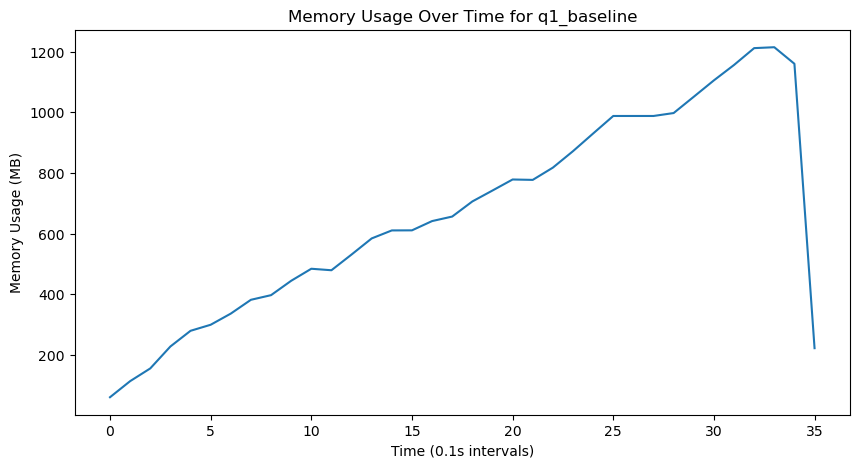

In [98]:
run_memory_profile(q1_baseline, file_path)

Function: q1_memory
Max Memory Usage: 99.81 MB
Avg Memory Usage: 93.07 MB
Execution Time: 3.46 seconds


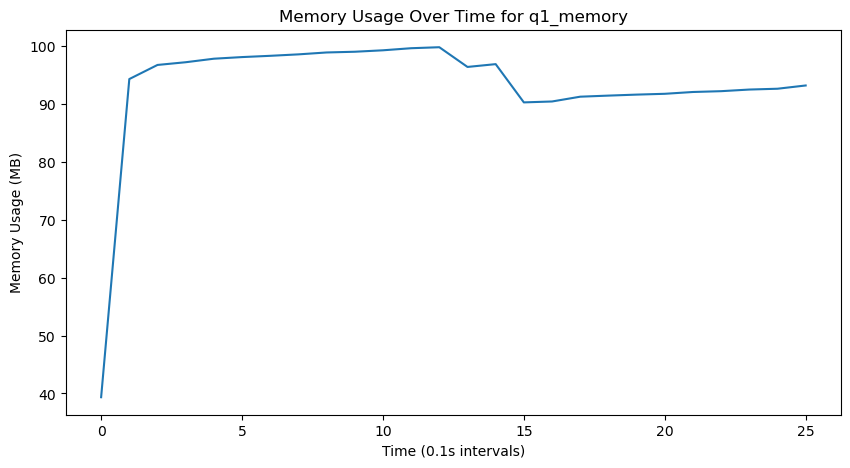

In [97]:
 # Profile q1_memory
run_memory_profile(q1_memory, file_path)

Function: q1_time
Max Memory Usage: 98.88 MB
Avg Memory Usage: 92.56 MB
Execution Time: 3.35 seconds


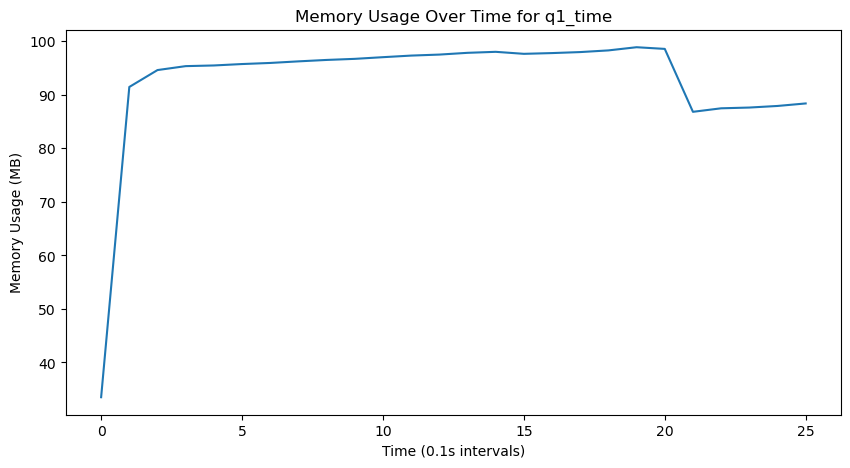

In [99]:
 # Profile q1_memory
run_memory_profile(q1_time, file_path)

# Q2 time - memory

A continuación se  muestra el desempeño en cuanto tiempo de ejecucíon del archivo baseline y de los otros dos archivos memory y time

In [4]:
result, stats = measure_execution_time(q2_baseline, file_path, num_runs=6)
print(f"Function returned: {result}")
print(f"Detailed stats: {stats}")

Average execution time: 3.7372 seconds
Standard deviation: 0.1618 seconds
Minimum time: 3.5979 seconds
Maximum time: 3.9907 seconds
Function returned: [('🙏', 1898), ('❤️', 934), ('🌾', 497), ('💚', 486), ('😂', 486), ('👍', 456), ('👉', 450), ('✊', 412), ('🇮🇳', 397), ('🙏🙏', 379)]
Detailed stats: {'avg_time': 3.737245875173054, 'std_dev': 0.16184929726209102, 'min_time': 3.5979272080003284, 'max_time': 3.9906624169962015, 'peak_memory': None}


In [5]:
result, stats = measure_execution_time(q2_time, file_path, num_runs=6)
print(f"Function returned: {result}")
print(f"Detailed stats: {stats}")

Processed 100000 tweets
Total processed tweets: 117407
Processed 100000 tweets
Total processed tweets: 117407
Processed 100000 tweets
Total processed tweets: 117407
Processed 100000 tweets
Total processed tweets: 117407
Processed 100000 tweets
Total processed tweets: 117407
Processed 100000 tweets
Total processed tweets: 117407
Average execution time: 1.7459 seconds
Standard deviation: 0.0119 seconds
Minimum time: 1.7354 seconds
Maximum time: 1.7681 seconds
Function returned: [('🙏', 1898), ('❤️', 934), ('🌾', 497), ('💚', 486), ('😂', 486), ('👍', 456), ('👉', 450), ('✊', 412), ('🇮🇳', 397), ('🙏🙏', 379)]
Detailed stats: {'avg_time': 1.7458731321627663, 'std_dev': 0.011924452464386143, 'min_time': 1.7354343339975458, 'max_time': 1.7681431249948218, 'peak_memory': None}


In [6]:
result, stats = measure_execution_time(q2_memory, file_path, num_runs=6)
print(f"Function returned: {result}")
print(f"Detailed stats: {stats}")

Average execution time: 1.7860 seconds
Standard deviation: 0.1116 seconds
Minimum time: 1.7284 seconds
Maximum time: 2.0125 seconds
Function returned: [('🙏', 1898), ('❤️', 934), ('🌾', 497), ('💚', 486), ('😂', 486), ('👍', 456), ('👉', 450), ('✊', 412), ('🇮🇳', 397), ('🙏🙏', 379)]
Detailed stats: {'avg_time': 1.785978867992526, 'std_dev': 0.1116235331257711, 'min_time': 1.728388499992434, 'max_time': 2.012490458000684, 'peak_memory': None}


A continuación se  muestra el desempeño en cuanto a uso de memoria del archivo baseline y de los otros dos archivos memory y time

Function: q2_baseline
Max Memory Usage: 1216.89 MB
Avg Memory Usage: 744.64 MB
Execution Time: 4.95 seconds


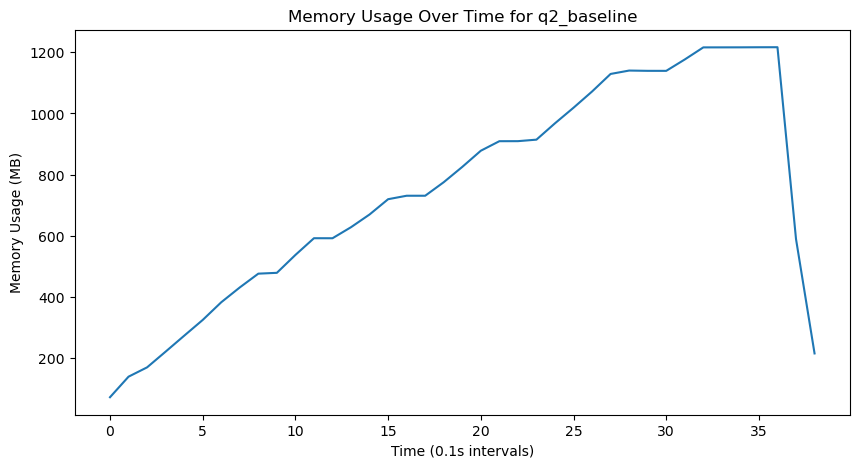

In [7]:
run_memory_profile(q2_baseline, file_path)

Function: q2_memory
Max Memory Usage: 235.53 MB
Avg Memory Usage: 232.26 MB
Execution Time: 3.14 seconds


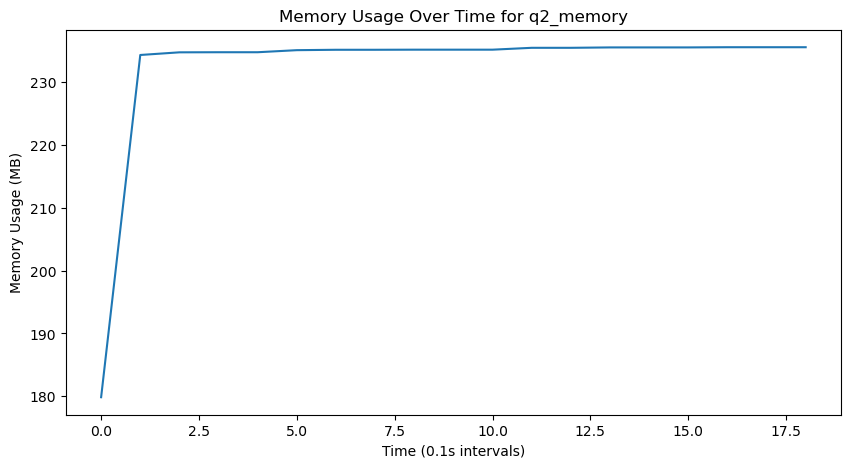

In [8]:
run_memory_profile(q2_memory, file_path)

Processed 100000 tweets
Total processed tweets: 117407
Function: q2_time
Max Memory Usage: 241.22 MB
Avg Memory Usage: 237.91 MB
Execution Time: 2.79 seconds


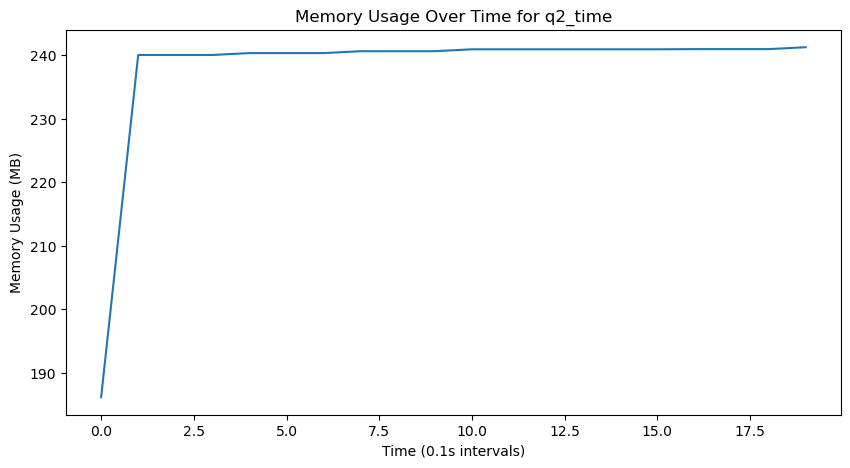

In [9]:
run_memory_profile(q2_time, file_path)

# Q3 time - memory

A continuación se  muestra el desempeño en cuanto tiempo de ejecucíon del archivo baseline y de los otros dos archivos memory y time

In [5]:
result, stats = measure_execution_time(q3_baseline, file_path, num_runs=6)
print(f"Function returned: {result}")
print(f"Detailed stats: {stats}")

Average execution time: 3.3960 seconds
Standard deviation: 0.2887 seconds
Minimum time: 2.9264 seconds
Maximum time: 3.6623 seconds
Function returned: [('narendramodi', 2261), ('Kisanektamorcha', 1836), ('RakeshTikaitBKU', 1639), ('PMOIndia', 1422), ('RahulGandhi', 1125), ('GretaThunberg', 1046), ('RaviSinghKA', 1015), ('rihanna', 972), ('UNHumanRights', 962), ('meenaharris', 925)]
Detailed stats: {'avg_time': 3.3960239585042777, 'std_dev': 0.28869842535497336, 'min_time': 2.9264057090040296, 'max_time': 3.6622786250081845, 'peak_memory': None}


In [6]:
result, stats = measure_execution_time(q3_time, file_path, num_runs=6)
print(f"Function returned: {result}")
print(f"Detailed stats: {stats}")

Average execution time: 1.6592 seconds
Standard deviation: 0.1978 seconds
Minimum time: 1.4837 seconds
Maximum time: 1.9173 seconds
Function returned: [('narendramodi', 2261), ('Kisanektamorcha', 1836), ('RakeshTikaitBKU', 1639), ('PMOIndia', 1422), ('RahulGandhi', 1125), ('GretaThunberg', 1046), ('RaviSinghKA', 1015), ('rihanna', 972), ('UNHumanRights', 962), ('meenaharris', 925)]
Detailed stats: {'avg_time': 1.659230902834679, 'std_dev': 0.197824831892959, 'min_time': 1.483725708007114, 'max_time': 1.9172817090002354, 'peak_memory': None}


In [7]:
result, stats = measure_execution_time(q3_memory, file_path, num_runs=6)
print(f"Function returned: {result}")
print(f"Detailed stats: {stats}")

Average execution time: 1.6204 seconds
Standard deviation: 0.1252 seconds
Minimum time: 1.5098 seconds
Maximum time: 1.8400 seconds
Function returned: [('narendramodi', 2261), ('Kisanektamorcha', 1836), ('RakeshTikaitBKU', 1639), ('PMOIndia', 1422), ('RahulGandhi', 1125), ('GretaThunberg', 1046), ('RaviSinghKA', 1015), ('rihanna', 972), ('UNHumanRights', 962), ('meenaharris', 925)]
Detailed stats: {'avg_time': 1.6204337083278613, 'std_dev': 0.12520445891724097, 'min_time': 1.5098464589973446, 'max_time': 1.8399738750013057, 'peak_memory': None}


A continuación se  muestra el desempeño en cuanto a uso de memoria del archivo baseline y de los otros dos archivos memory y time

Function: q3_baseline
Max Memory Usage: 1229.67 MB
Avg Memory Usage: 713.55 MB
Execution Time: 4.91 seconds


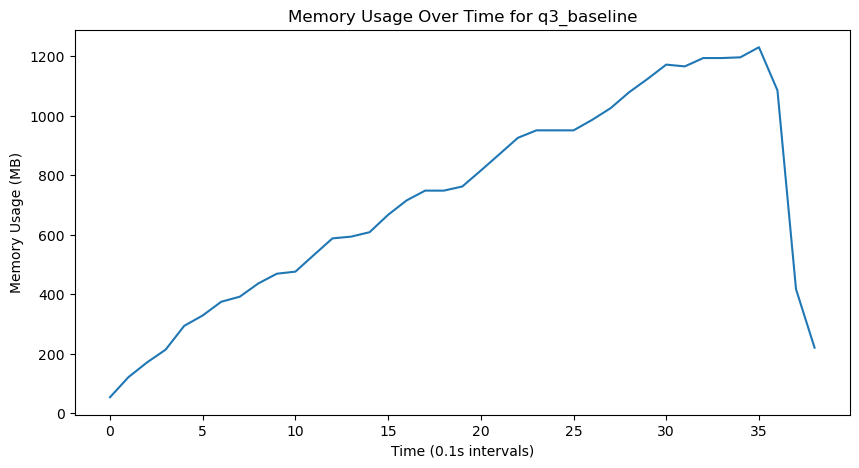

In [8]:
run_memory_profile(q3_baseline, file_path)

Function: q3_time
Max Memory Usage: 249.69 MB
Avg Memory Usage: 245.86 MB
Execution Time: 2.64 seconds


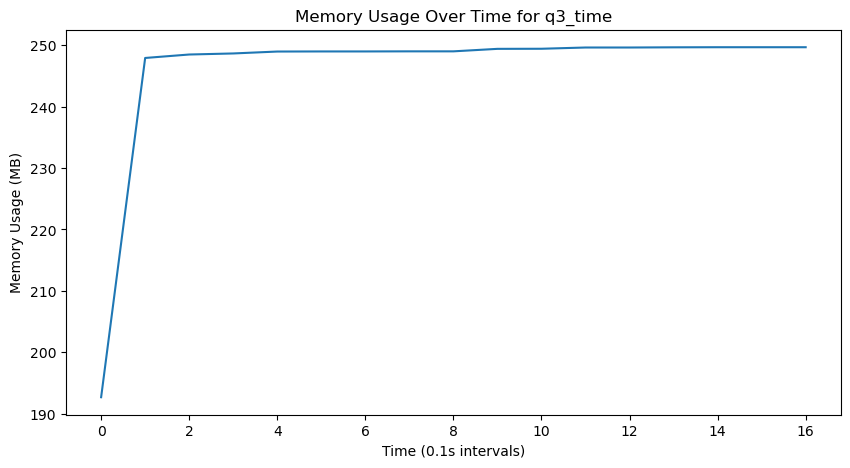

In [9]:
run_memory_profile(q3_time, file_path)

Function: q3_memory
Max Memory Usage: 229.78 MB
Avg Memory Usage: 215.46 MB
Execution Time: 2.88 seconds


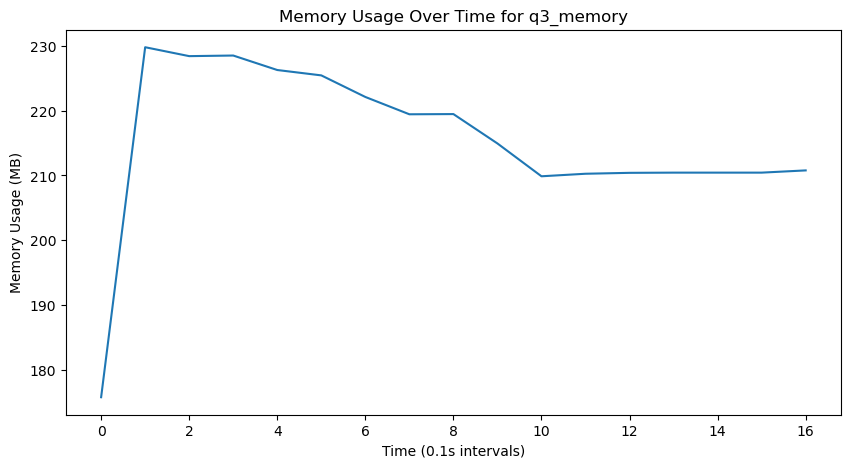

In [11]:
run_memory_profile(q3_memory, file_path)

# Posibles mejoras en el diseño

1. Separación de responsabilidades: Cada función está ejecutando múltiples tareas, parsing de datos, operaciones I/O. Aplicando el principio de Single responsibility,  la función principal se podría dividir en varios métodos.

2. Se podría implementar un patrón strategy para los distinto análisis que se requieran ( top de fechas, top de emojis, entre otros.)

3. También se podría implementar un patrón Observer para dar updates o notificaciones sobre el procesamiento de los datos.

4. Usar asyncio para mejorar el desempeño de los scripts.

